**Reference**: 
https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier<br>
Copyright (c) 2007–2019 The scikit-learn developers.

## Voting Classifier¶

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

### Plot the decision boundaries of a VotingClassifier for two features of the Iris dataset.

Plot the class probabilities of the first sample in a toy dataset predicted by three different classifiers and averaged by the VotingClassifier.

First, three exemplary classifiers are initialized (DecisionTreeClassifier, KNeighborsClassifier, and SVC) and used to initialize a soft-voting VotingClassifier with weights [2, 1, 2], which means that the predicted probabilities of the DecisionTreeClassifier and SVC count 5 times as much as the weights of the KNeighborsClassifier classifier when the averaged probability is calculated.

In [1]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score



Automatically created module for IPython interactive environment


In [2]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
# Training classifiers
# a) First select the classifiers and parameters to be used;
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('DecisionTreeClassifier', clf1), 
                                    ('KNeighborsClassifier', clf2),
                                    ('SVC', clf3)],voting='soft', weights=[2, 1, 2])

# a) Then iterate the list ro tollect the training scores; 
for clf, label in zip([clf1, clf2, clf3, eclf],['DecisionTreeClassifier',
                                                'KNeighborsClassifier',
                                                'SVC',
                                                'Ensemble']):
    
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.93 (+/- 0.07) [DecisionTreeClassifier]
Accuracy: 0.94 (+/- 0.04) [KNeighborsClassifier]
Accuracy: 0.95 (+/- 0.03) [SVC]
Accuracy: 0.95 (+/- 0.03) [Ensemble]


In [4]:
#Fit the classifiers to the data
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter

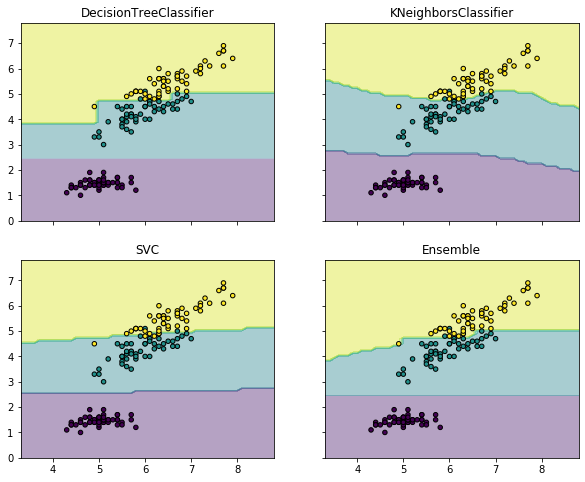

In [6]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['DecisionTreeClassifier',
                         'KNeighborsClassifier',
                         'SVC',
                         'Ensemble']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()